# Numpy vs pytorch

In [2]:
import torch

data = torch.arange(10, dtype=torch.float32)
print("data", data)
print("shape", data.shape)

dataMatrix = data.reshape(5, 2)
print("data", dataMatrix)
print("shape", dataMatrix.shape)

print("data first column", dataMatrix[:, 0])

print("data second row", dataMatrix[1])


data tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
shape torch.Size([10])
data tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])
shape torch.Size([5, 2])
data first column tensor([0., 2., 4., 6., 8.])
data second row tensor([2., 3.])


In [4]:
import numpy as np

data = np.arange(10, dtype=float)
print("data", data)
print("shape", data.shape)

dataMatrix = data.reshape(5, 2)
print("data", dataMatrix)
print("shape", dataMatrix.shape)

print("data first column", dataMatrix[:, 0])

print("data second row", dataMatrix[1])

data [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
shape (10,)
data [[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
shape (5, 2)
data first column [0. 2. 4. 6. 8.]
data second row [2. 3.]


# Math Q&A

Any questions about the review of:
* linear algebra?
* calculus?
* probability and statistics?

# Introduction to Machine Learning

## Machine Learning vs Data Science

Machine learning (ML) is a subfield of computer science that studies algorithms for developing computer systems that can improve automatically through data analysis.  


Data science is the discipline of extracting actionable insights from unstructured or structured data.

Since the predominant approach to building AIs today is machine learning, and since machine learning requires data, much of ML/AI requires data science.

At the same time, data science increasingly uses ML/AI, for example to extract structure from unstructured data. 

## What You Need for Machine Learning

1. A set of *data* - each data point (sample; observation) has a set of associated features (variables)

2. A *model architecture* - a particular computer data structure that we can instantiate as a model and "fit" to our data

3. An *objective function* - this function quantifies how well a trained model is doing

4. A machine learning *algorithm* - this algorithm tells how to adjust the model's parameters to increase the fit to the data / optimize the objective function

## About Data

Rarely talked about in ML classes; super important to ML in the real world (80-90% of the time is spent curating the data!).

For deep learning (when training from scratch) you need quite a bit.

Some sources of data for deep learning:
* huggingface
* papers with code
* kaggle

## Data Sampling

When we sample data for use in machine learning, we do one of the following (from simplest/worst to most complex / best):
* Any old sample - for example, scraping 1000 reddit posts in order
* A random sample - flip a *weighted) coin as to whether to include each data point in your sample

Make sure to account for any dependencies (e.g. geographic, temporal) in your data when you sample.

## Maching Learning Tasks and Sample Model Architectures



(*image from https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/*)

Any given model architecture may have multiple *hyperparameters*; these are settings you can tweak, such as the number of trees to permit in a random forest, or the number of clusters in k-means clustering.

## Objective Functions

We usually define them so that *lower is better*, and then we call them *loss functions*.

Examples:
* squared error 
* error rate

## About Supervised Machine Learning

### The Data

For supervised machine learning, the data has to be *labeled*. One of the features of the data is called out as the *label* (or *dependent variable*).
* For regression, the labels should be quantitative.
* For classification, they should be qualitative nominal.

For deep learning, all our data must be first *embedded* as vectors (this is easier for image data than for text data!), and possibly have context *encoded*.

### Model Architectures

We are focused here on deep learning. So our model architectures will consist of arrangements of *neurons*, each connected to the input, the output or one or more other neurons, and each calculating a relatively simple function. We will characterize these architectures by:
* Number of layers (depth)
* Size of each layer (width)
* Nature of between-layer connections
* Type of function calculated by each neuron

### Training

Except for simple regression, we typically don't have analytical methods for fitting models. Rather, we use an *optimization algorithm*, typically a variant of *gradient descent*.

https://www.i-am.ai/gradient-descent.html

In addition to choosing the optimization algorithm, we can often tweak *hyperparameters* associated with the optimization algorithm, such as the learning rate.

Just "watching the loss" over round after round of training can be informative: is your model's loss converging? Are you starting to overfit?

### Evaluating

Quite often, we want to try multiple hyperparameter settings. So we split our data into:
* train - most of our data should go here.
* dev - we use this to compare the performance of different models trained using different model architectures and/or optimization algorithms, with different hyperparameter settings.
* test - we don't touch this til we have chosen a "best" model; then we evaluate by running the "best" model on this to see if it generalizes.

Sometimes (especially with simpler models) a model will *overfit* to the training data. It'll work much better on the training data than on the test data.

### Splitting Data

To split data for supervised learning, we can:
* Random split - make sure it's truly random! To see an example where not random makes a big difference, check out the iris dataset.
* Stratified sample - let's say you are splitting your data 80/10/10 train/dev/test. With stratified sampling for classification tasks, you'd first split your data by label, then make sure that the data subset for each label is split 80/10/10 into train/dev/test. This can make a huge difference if your data is *unbalanced*.
* Cross validation - it's best practice when doing ML experiments to perform cross validation. But many people don't. For more, see https://direct.mit.edu/neco/article-abstract/10/7/1895/6224/Approximate-Statistical-Tests-for-Comparing.

## A Typical Machine Learning Workflow

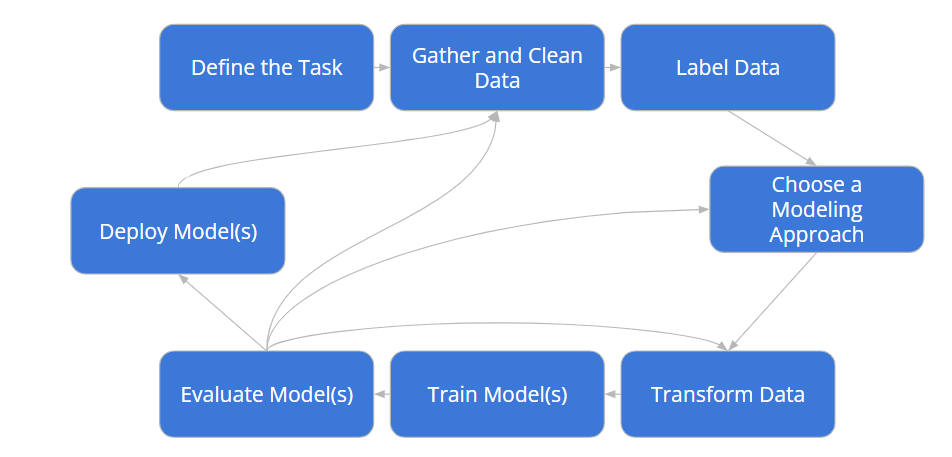

In this course we won't talk a lot about: defining the task; gathering and cleaning data; labeling data. In CS251/2 you learned about how to transform data: how to translate, scale, rotate and normalize it and how to use PCA for dimensionality reduction. In this course we will experiment with several types of modeling architecture, a few different optimization algorithms, and some ways to perform hyperparameter tuning.

## A Playground

http://playground.tensorflow.org/

# Project 1

In this project you will implement an _Ad_aptive _Li_near _Ne_uron. This is a single-layer neural network. However, it exemplifies all the parts of a deep learning model architecture, and you will also work through data embedding, training and evaluation for both classification and regression tasks.

Let's take a look at Adaline. Adaline has:
* an input layer
* weights (on the edges connecting the input to the output layer)
* *no hidden layers*
* an output layer with an activation function (in this case, the identity function)

Adaline can:
* read data
* fit the model architecture to the data via running a *forward* and a *backward* pass on data points from the training sample of the data (the fitting may run over and over for a set number of *epochs* or until the *loss* is not changing very much)
  * forward pass - predicts
  * backward pass - updates the weights so the model better fits the data
* evaluate the trained model via running a *forward* pass on the test sample of the data

The function Adaline fits is, for input $x_i$, $\sum_{j=1}^{M} {x_i}_j w_j + w_0$ ($w_0$ is a bias term). This should look familiar to those of you who took CS251/2! But don't worry, we will review on Thursday.